In [2]:
import pandas as pd  
import glob 
import warnings
import numpy as np    
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime 
import seaborn as sns
import sys                                        
import math                                       
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_to_excel_files = glob.glob(r'F:\newdata.xlsx')
for excel in path_to_excel_files:
 out = excel.split('.')[0]+'.csv'
 df = pd.read_excel(excel,skiprows=0)
 df.to_csv(out) 

In [4]:
data = df

In [5]:
#see all column names & rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data.head(10)

,OBJECTID_1,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
0,1,14.376078,37.377803,48.246118,1.5075,27,20,57,1.38
1,2,11.248594,33.745782,55.005624,1.5297,26,22,53,1.37
2,3,19.960000,20.190000,59.850000,1.4900,25,19,57,1.45
3,4,20.010000,6.530000,73.460000,1.6000,23,18,58,1.49
4,5,35.460000,26.840000,37.700000,1.3200,26,22,54,1.38
5,6,25.375154,31.900369,42.724477,1.4437,28,22,54,1.37
6,7,11.346445,41.603631,47.049924,1.5025,23,20,55,1.40
7,8,23.650000,39.650000,36.700000,1.4100,21,17,61,1.49
8,9,30.120000,23.450000,46.430000,1.4300,22,17,58,1.47
9,10,28.970000,34.980000,36.050000,1.3900,26,21,59,1.41


In [7]:
data.describe()

,OBJECTID_1,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,58.389474,30.483031,33.009827,34.503984,1.369910,26.126316,19.442105,54.442105,1.409579
std,34.340688,12.679921,14.153390,14.390270,0.166721,2.384534,1.831845,3.331717,0.031955
min,1.000000,8.615738,5.000000,5.240000,0.945102,21.000000,16.000000,45.000000,1.330000
25%,25.000000,20.825000,20.601204,23.600000,1.210100,25.000000,18.000000,53.000000,1.390000
50%,60.000000,30.000000,33.130867,33.500000,1.410000,26.000000,19.000000,55.000000,1.410000
75%,88.500000,39.605000,41.801815,46.015000,1.514724,27.500000,20.000000,56.000000,1.430000
max,112.000000,65.445026,66.920000,73.460000,1.686400,34.000000,24.000000,61.000000,1.490000


In [8]:
data['Clay_ob'] = data['Clay_ob']/100

In [9]:
data['Silt_ob'] = data['Silt_ob']/100

In [10]:
data['Sand_ob'] = data['Sand_ob']/100

In [11]:
data['db_ob'] = data['db_ob']/2

In [12]:
data['clay_p'] = data['clay_p']/100

In [13]:
data['silt_p'] = data['silt_p']/100

In [14]:
data['sand_p'] = data['sand_p']/100

In [15]:
data['db_p'] = data['db_p']/2

In [16]:
pd.set_option('display.max_columns', 10)

In [17]:
data.head(10)

,OBJECTID_1,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
0,1,0.143761,0.373778,0.482461,0.75375,0.27,0.20,0.57,0.690
1,2,0.112486,0.337458,0.550056,0.76485,0.26,0.22,0.53,0.685
2,3,0.199600,0.201900,0.598500,0.74500,0.25,0.19,0.57,0.725
3,4,0.200100,0.065300,0.734600,0.80000,0.23,0.18,0.58,0.745
4,5,0.354600,0.268400,0.377000,0.66000,0.26,0.22,0.54,0.690
5,6,0.253752,0.319004,0.427245,0.72185,0.28,0.22,0.54,0.685
6,7,0.113464,0.416036,0.470499,0.75125,0.23,0.20,0.55,0.700
7,8,0.236500,0.396500,0.367000,0.70500,0.21,0.17,0.61,0.745
8,9,0.301200,0.234500,0.464300,0.71500,0.22,0.17,0.58,0.735
9,10,0.289700,0.349800,0.360500,0.69500,0.26,0.21,0.59,0.705


In [18]:
X=data[['Clay_ob']]
y=data[['clay_p']]



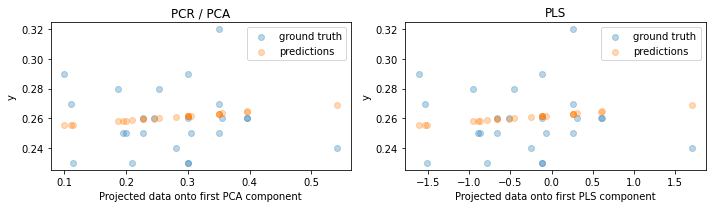

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()

plt.tight_layout()
plt.show()

In [20]:
from scipy import stats

In [21]:
stats.spearmanr(data['Clay_ob'],data['clay_p'])

SpearmanrResult(correlation=0.08324780086483677, pvalue=0.42252332725523534)

In [22]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(data['Clay_ob'], data['clay_p'])

0.01754697684019461